In [112]:
import pandas as pd
import matplotlib.pyplot as plt


In [113]:
abbrs = [
    'ATL','BOS','BRK','CHI','CHO',
    'CLE','DAL','DEN','DET','GSW',
    'HOU','IND','LAC','LAL','MEM',
    'MIA','MIL','MIN','NOP','NYK',
    'OKC','ORL','PHI','PHO','POR',
    'SAC','SAS','TOR','UTA','WAS'
]

full_tm_name = [
    'Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets', 'Chicago Bulls', 'Charlotte Hornets',
    'Cleveland Cavaliers', 'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors',
    'Houston Rockets', 'Indiana Pacers', 'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
    'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves', 'New Orleans Pelicans', 'New York Knicks',
    'Oklahoma City Thunder', 'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns', 'Portland Trail Blazers',
    'Sacramento Kings', 'San Antonio Spurs', 'Toronto Raptors', 'Utah Jazz', 'Washington Wizards'
]

In [114]:
abbr_map = dict(zip( abbrs,full_tm_name))
opp_abbr_map = dict(zip(full_tm_name, abbrs))

In [115]:
def get_tm_data():
    url = "https://widgets.sports-reference.com/wg.fcgi?css=1&site=bbr&url=%2Fleagues%2FNBA_2022_standings.html&div=div_expanded_standings"
    df = pd.read_html(url)[0]
    return df

In [116]:
standings_df=get_tm_data()
standings_df.columns = standings_df.columns.droplevel()
standings_df['RA ≥.500'] = '0-0'
standings_df['RA <.500'] = '0-0'
standings_df['pct'] = '.000'
for team_i in range(len(full_tm_name)):
    team_index = standings_df.index[standings_df['Team'] == full_tm_name[team_i]][0]
    record = standings_df.loc[standings_df['Team'] == full_tm_name[team_i], 'Overall'][team_index]
    wins = int(record.split('-')[0])
    losses = int(record.split('-')[1])
    pct = round(wins/(wins+losses),3)
    standings_df.loc[standings_df['Team'] == full_tm_name[team_i], 'pct'] = pct
standings_df

,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Oct,Nov,Dec,Jan,Feb,Mar,Apr,RA ≥.500,RA <.500,pct
0,1,Golden State Warriors,18-3,11-1,7-2,8-1,10-2,3-0,3-0,2-1,...,5-1,13-2,0-0,0-0,0-0,0-0,0-0,0-0,0-0,0.857
1,2,Phoenix Suns,18-3,9-2,9-1,5-0,13-3,2-0,2-0,1-0,...,2-3,16-0,0-0,0-0,0-0,0-0,0-0,0-0,0-0,0.857
2,3,Brooklyn Nets,15-6,7-4,8-2,13-4,2-2,4-0,5-2,4-2,...,4-3,11-3,0-0,0-0,0-0,0-0,0-0,0-0,0-0,0.714
3,4,Chicago Bulls,14-8,7-4,7-4,8-5,6-3,4-3,2-1,2-1,...,5-1,9-7,0-0,0-0,0-0,0-0,0-0,0-0,0-0,0.636
4,5,Utah Jazz,14-7,8-4,6-3,5-5,9-2,2-0,1-2,2-3,...,5-1,9-6,0-0,0-0,0-0,0-0,0-0,0-0,0-0,0.667
5,6,Charlotte Hornets,13-10,7-2,6-8,9-5,4-5,2-1,3-2,4-2,...,5-2,8-8,0-0,0-0,0-0,0-0,0-0,0-0,0-0,0.565
6,7,Miami Heat,13-8,6-2,7-6,7-3,6-5,1-1,3-1,3-1,...,5-1,8-7,0-0,0-0,0-0,0-0,0-0,0-0,0-0,0.619
7,8,Milwaukee Bucks,13-8,6-4,7-4,9-5,4-3,3-2,4-0,2-3,...,3-4,10-4,0-0,0-0,0-0,0-0,0-0,0-0,0-0,0.619
8,9,Washington Wizards,13-8,7-2,6-6,9-6,4-2,3-2,3-0,3-4,...,5-1,8-7,0-0,0-0,0-0,0-0,0-0,0-0,0-0,0.619
9,10,Los Angeles Lakers,12-11,8-6,4-5,6-4,6-7,0-2,4-2,2-0,...,4-3,8-8,0-0,0-0,0-0,0-0,0-0,0-0,0-0,0.522


In [117]:
def get_tmvtm_data():
    url = "https://widgets.sports-reference.com/wg.fcgi?css=1&site=bbr&url=%2Fleagues%2FNBA_2022_standings.html&div=div_team_vs_team"
    df = pd.read_html(url)[0]
    return df

In [118]:
tmvtm_df=get_tmvtm_data()
tmvtm_df.set_index('Team')

tmvtm_df

,Rk,Team,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
0,1,Atlanta Hawks,NaN,1-0,0-1,0-0,1-0,0-1,1-0,0-1,...,1-0,1-0,0-1,0-1,0-0,0-0,1-0,0-0,0-2,1-1
1,2,Boston Celtics,0-1,NaN,0-1,0-1,1-0,1-1,0-1,0-0,...,1-0,1-0,0-0,0-0,0-0,0-0,0-1,2-1,0-0,0-2
2,3,Brooklyn Nets,1-0,1-0,NaN,0-1,0-1,2-0,0-0,0-0,...,1-0,2-0,1-0,0-1,0-0,0-0,0-0,1-0,0-0,1-0
3,4,Chicago Bulls,0-0,1-0,1-0,NaN,1-0,0-0,1-0,1-0,...,0-0,1-0,0-2,0-0,0-1,0-0,0-0,1-0,1-0,0-0
4,5,Charlotte Hornets,0-1,0-1,1-0,0-1,NaN,1-1,0-0,0-0,...,0-0,2-0,0-0,0-0,1-0,0-1,0-0,0-0,0-0,2-0
5,6,Cleveland Cavaliers,1-0,1-1,0-2,0-0,1-1,NaN,1-0,1-0,...,0-0,1-0,0-0,0-2,1-0,0-0,0-0,1-0,0-0,0-1
6,7,Dallas Mavericks,0-1,1-0,0-0,0-1,0-0,0-1,NaN,1-1,...,0-0,0-0,0-0,0-2,0-0,1-0,3-0,1-0,0-0,0-1
7,8,Denver Nuggets,1-0,0-0,0-0,0-1,0-0,0-1,1-1,NaN,...,0-0,0-0,0-1,1-1,1-1,0-0,1-0,0-0,0-1,0-0
8,9,Detroit Pistons,0-1,0-0,0-2,0-2,0-0,0-1,0-0,0-0,...,0-0,1-0,0-2,0-0,0-1,0-1,0-0,1-0,0-0,0-0
9,10,Golden State Warriors,1-0,0-0,1-0,1-0,1-1,1-0,0-0,0-0,...,2-0,0-0,1-0,0-1,1-0,1-0,0-0,1-0,0-0,0-0


In [119]:
offset_i = 0
for team_i in range(len(full_tm_name)):
    for abb_i in range(offset_i +1,len(abbrs)):
        tvt_cell = tmvtm_df.loc[tmvtm_df['Team'] == full_tm_name[team_i], abbrs[abb_i]]
        wins = tvt_cell[team_i].split('-')[0]
        losses = tvt_cell[team_i].split('-')[1]
        team_1_wins = int(wins)
        team_1_losses = int(losses)
        team_2_wins = int(losses)
        team_2_losses = int(wins)
        
        team_1_index = standings_df.index[standings_df['Team'] == full_tm_name[team_i]][0]
        team_2_index = standings_df.index[standings_df['Team'] == abbr_map[abbrs[abb_i]]][0]
        
        team_1_pct = standings_df.loc[standings_df['Team'] == full_tm_name[team_i], 'pct'][team_1_index]
        team_2_pct = standings_df.loc[standings_df['Team'] == abbr_map[abbrs[abb_i]], 'pct'][team_2_index]

        team_1_o5_wins = int(standings_df.loc[standings_df['Team'] == full_tm_name[team_i], 'RA ≥.500'][team_1_index].split('-')[0])
        team_1_o5_losses = int(standings_df.loc[standings_df['Team'] == full_tm_name[team_i], 'RA ≥.500'][team_1_index].split('-')[1])
        team_1_u5_wins = int(standings_df.loc[standings_df['Team'] == full_tm_name[team_i], 'RA <.500'][team_1_index].split('-')[0])
        team_1_u5_losses = int(standings_df.loc[standings_df['Team'] == full_tm_name[team_i], 'RA <.500'][team_1_index].split('-')[1])
        
        team_2_o5_wins = int(standings_df.loc[standings_df['Team'] == abbr_map[abbrs[abb_i]], 'RA ≥.500'][team_2_index].split('-')[0])
        team_2_o5_losses = int(standings_df.loc[standings_df['Team'] == abbr_map[abbrs[abb_i]], 'RA ≥.500'][team_2_index].split('-')[1])
        team_2_u5_wins = int(standings_df.loc[standings_df['Team'] == abbr_map[abbrs[abb_i]], 'RA <.500'][team_2_index].split('-')[0])
        team_2_u5_losses = int(standings_df.loc[standings_df['Team'] == abbr_map[abbrs[abb_i]], 'RA <.500'][team_2_index].split('-')[1])
        
        if(team_2_pct >= .5):
            team_1_o5_wins += team_1_wins
            team_1_o5_losses += team_1_losses
            record_str = str(team_1_o5_wins) + "-" + str(team_1_o5_losses)
            standings_df.loc[standings_df['Team'] == full_tm_name[team_i], 'RA ≥.500'] = record_str
        else:
            team_1_u5_wins += team_1_wins
            team_1_u5_losses += team_1_losses
            record_str = str(team_1_u5_wins) + "-" + str(team_1_u5_losses)
            standings_df.loc[standings_df['Team'] == full_tm_name[team_i], 'RA <.500'] = record_str
            
        if(team_1_pct >= .5):
            team_2_o5_wins += team_2_wins
            team_2_o5_losses += team_2_losses
            record_str = str(team_2_o5_wins) + "-" + str(team_2_o5_losses)
            standings_df.loc[standings_df['Team'] == abbr_map[abbrs[abb_i]], 'RA ≥.500'] = record_str
        else:
            team_2_u5_wins += team_2_wins
            team_2_u5_losses += team_2_losses
            record_str = str(team_2_u5_wins) + "-" + str(team_2_u5_losses)
            standings_df.loc[standings_df['Team'] == abbr_map[abbrs[abb_i]], 'RA <.500'] = record_str
        
        
        
    offset_i += 1

    

In [71]:
print(abbr_map['ATL'])

Atlanta Hawks


In [120]:
standings_df['o5pct'] = '.000'
standings_df['u5pct'] = '.000'
for team_i in range(len(full_tm_name)):
    team_index = standings_df.index[standings_df['Team'] == full_tm_name[team_i]][0]
    o5record = standings_df.loc[standings_df['Team'] == full_tm_name[team_i], 'RA ≥.500'][team_index]
    o5wins = int(o5record.split('-')[0])
    o5losses = int(o5record.split('-')[1])
    o5pct = round(o5wins/(o5wins+o5losses),3)
    u5record = standings_df.loc[standings_df['Team'] == full_tm_name[team_i], 'RA <.500'][team_index]
    u5wins = int(u5record.split('-')[0])
    u5losses = int(u5record.split('-')[1])
    u5pct = round(u5wins/(u5wins+u5losses),3)
    standings_df.loc[standings_df['Team'] == full_tm_name[team_i], 'o5pct'] = o5pct
    standings_df.loc[standings_df['Team'] == full_tm_name[team_i], 'u5pct'] = u5pct
standings_df

,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Dec,Jan,Feb,Mar,Apr,RA ≥.500,RA <.500,pct,o5pct,u5pct
0,1,Golden State Warriors,18-3,11-1,7-2,8-1,10-2,3-0,3-0,2-1,...,0-0,0-0,0-0,0-0,0-0,11-3,7-0,0.857,0.786,1
1,2,Phoenix Suns,18-3,9-2,9-1,5-0,13-3,2-0,2-0,1-0,...,0-0,0-0,0-0,0-0,0-0,13-2,5-1,0.857,0.867,0.833
2,3,Brooklyn Nets,15-6,7-4,8-2,13-4,2-2,4-0,5-2,4-2,...,0-0,0-0,0-0,0-0,0-0,7-6,8-0,0.714,0.538,1
3,4,Chicago Bulls,14-8,7-4,7-4,8-5,6-3,4-3,2-1,2-1,...,0-0,0-0,0-0,0-0,0-0,9-6,5-2,0.636,0.6,0.714
4,5,Utah Jazz,14-7,8-4,6-3,5-5,9-2,2-0,1-2,2-3,...,0-0,0-0,0-0,0-0,0-0,6-4,8-3,0.667,0.6,0.727
5,6,Charlotte Hornets,13-10,7-2,6-8,9-5,4-5,2-1,3-2,4-2,...,0-0,0-0,0-0,0-0,0-0,9-8,4-2,0.565,0.529,0.667
6,7,Miami Heat,13-8,6-2,7-6,7-3,6-5,1-1,3-1,3-1,...,0-0,0-0,0-0,0-0,0-0,9-7,4-1,0.619,0.562,0.8
7,8,Milwaukee Bucks,13-8,6-4,7-4,9-5,4-3,3-2,4-0,2-3,...,0-0,0-0,0-0,0-0,0-0,5-7,8-1,0.619,0.417,0.889
8,9,Washington Wizards,13-8,7-2,6-6,9-6,4-2,3-2,3-0,3-4,...,0-0,0-0,0-0,0-0,0-0,8-5,5-3,0.619,0.615,0.625
9,10,Los Angeles Lakers,12-11,8-6,4-5,6-4,6-7,0-2,4-2,2-0,...,0-0,0-0,0-0,0-0,0-0,4-8,8-3,0.522,0.333,0.727


In [121]:
standings_df["abbr"] = standings_df.Team.map(opp_abbr_map)

In [122]:
standings_df

,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Jan,Feb,Mar,Apr,RA ≥.500,RA <.500,pct,o5pct,u5pct,abbr
0,1,Golden State Warriors,18-3,11-1,7-2,8-1,10-2,3-0,3-0,2-1,...,0-0,0-0,0-0,0-0,11-3,7-0,0.857,0.786,1,GSW
1,2,Phoenix Suns,18-3,9-2,9-1,5-0,13-3,2-0,2-0,1-0,...,0-0,0-0,0-0,0-0,13-2,5-1,0.857,0.867,0.833,PHO
2,3,Brooklyn Nets,15-6,7-4,8-2,13-4,2-2,4-0,5-2,4-2,...,0-0,0-0,0-0,0-0,7-6,8-0,0.714,0.538,1,BRK
3,4,Chicago Bulls,14-8,7-4,7-4,8-5,6-3,4-3,2-1,2-1,...,0-0,0-0,0-0,0-0,9-6,5-2,0.636,0.6,0.714,CHI
4,5,Utah Jazz,14-7,8-4,6-3,5-5,9-2,2-0,1-2,2-3,...,0-0,0-0,0-0,0-0,6-4,8-3,0.667,0.6,0.727,UTA
5,6,Charlotte Hornets,13-10,7-2,6-8,9-5,4-5,2-1,3-2,4-2,...,0-0,0-0,0-0,0-0,9-8,4-2,0.565,0.529,0.667,CHO
6,7,Miami Heat,13-8,6-2,7-6,7-3,6-5,1-1,3-1,3-1,...,0-0,0-0,0-0,0-0,9-7,4-1,0.619,0.562,0.8,MIA
7,8,Milwaukee Bucks,13-8,6-4,7-4,9-5,4-3,3-2,4-0,2-3,...,0-0,0-0,0-0,0-0,5-7,8-1,0.619,0.417,0.889,MIL
8,9,Washington Wizards,13-8,7-2,6-6,9-6,4-2,3-2,3-0,3-4,...,0-0,0-0,0-0,0-0,8-5,5-3,0.619,0.615,0.625,WAS
9,10,Los Angeles Lakers,12-11,8-6,4-5,6-4,6-7,0-2,4-2,2-0,...,0-0,0-0,0-0,0-0,4-8,8-3,0.522,0.333,0.727,LAL


In [123]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.1)

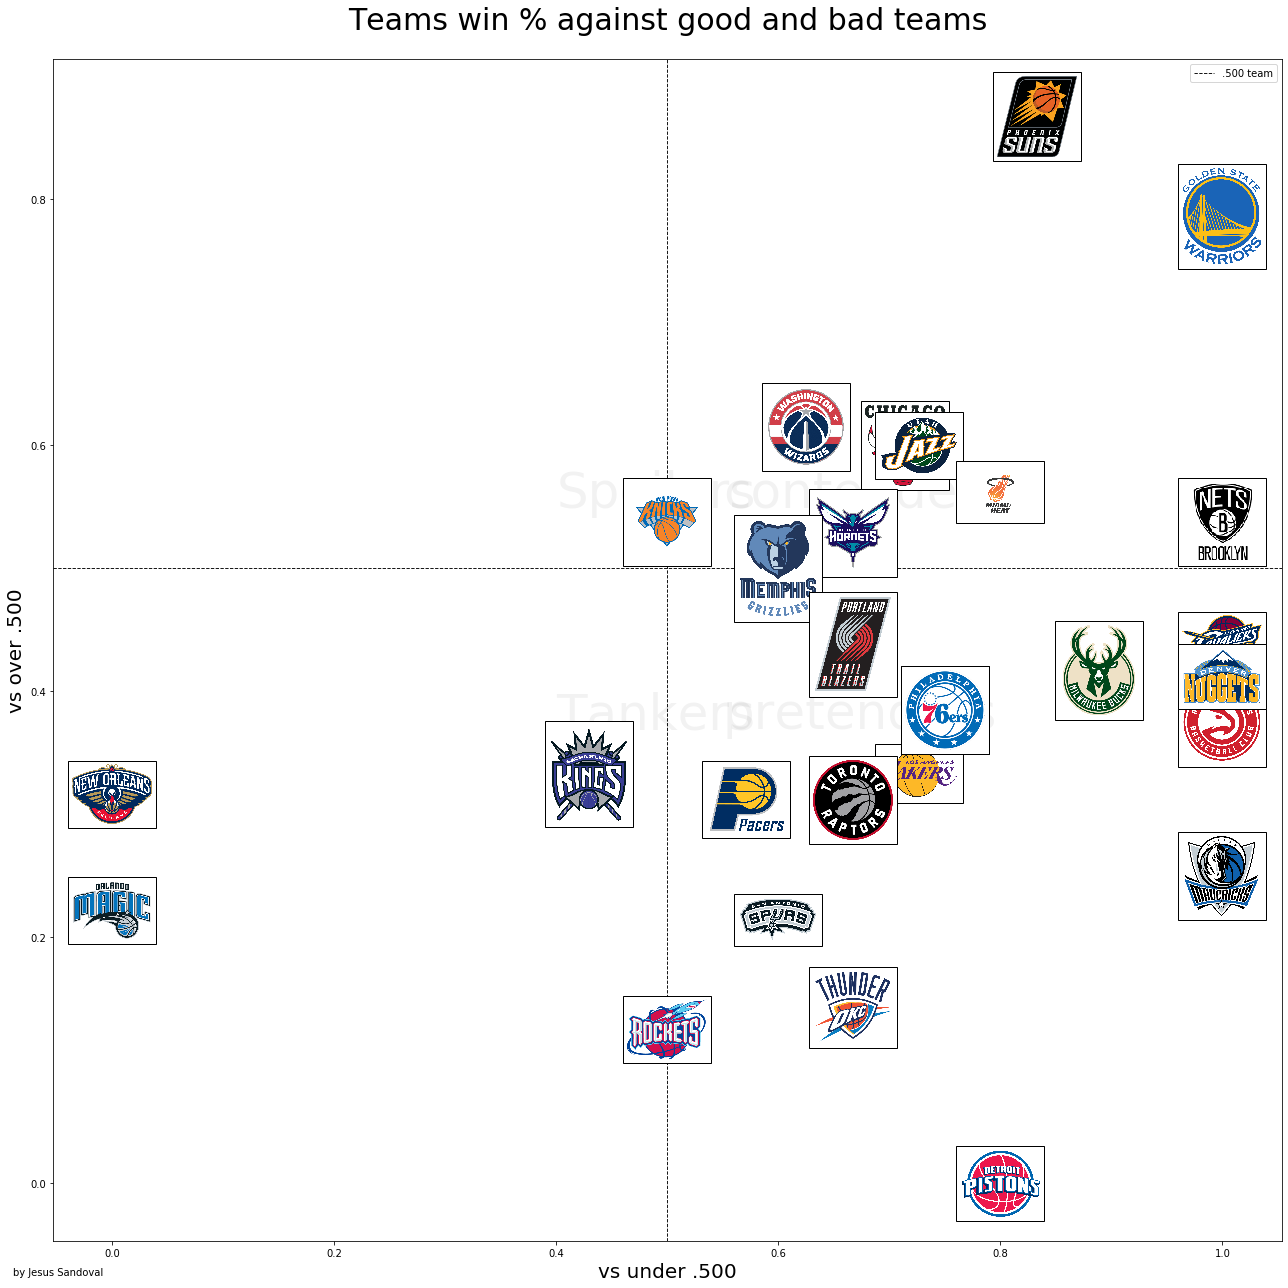

In [124]:
# define some styles
conf = dict(
    label_size=20,
    title_size=30,
    quad_text_size = 50,
    quad_text_alpha = .05
)

f, ax = plt.subplots(figsize=(18,18))
ax.scatter(standings_df.u5pct, standings_df.o5pct)
ax.axhline(.5, ls='--', c='k', lw=0.9, label=".500 team")
ax.axvline(.5, ls='--', c='k', lw=0.9)

imgs = [
    ax.add_artist(
        AnnotationBbox(getImage(f'{tm.abbr}.png'),
                      (tm.u5pct, tm.o5pct),
                       frameon=True
                      )
    )
    for tm in standings_df.itertuples()
]

# quadrant descriptions
ax.annotate("Spoilers",(.4,.55),fontsize=conf["quad_text_size"],alpha=conf["quad_text_alpha"])
ax.annotate("contenders",(.55,.55),fontsize=conf["quad_text_size"],alpha=conf["quad_text_alpha"])
ax.annotate("Tankers",(.4,.37),fontsize=conf["quad_text_size"],alpha=conf["quad_text_alpha"])
ax.annotate("pretenders",(.55,.37),fontsize=conf["quad_text_size"],alpha=conf["quad_text_alpha"])



# annotate tigers
# ax.annotate(
#     "somehow this\ntigers logo seemed\nmost approriate",
#     (.45, 0.51),
#     xytext = (-180,50),
#         textcoords="offset pixels",
#         arrowprops=dict(
#                      arrowstyle="->")
# )

plt.legend()
plt.xlabel("vs under .500", size=conf["label_size"])
plt.ylabel("vs over .500", size=conf["label_size"])
plt.title("Teams win % against good and bad teams", size=conf["title_size"], pad=30)
plt.tight_layout()
plt.annotate("by Jesus Sandoval", (.01,.01), xycoords='figure fraction')
plt.savefig("records_vs_above_500.png")